Output 0: output_cov/Sigmoid:0, Shape: ['unk__151', 4, 34, 60]
Output 1: output_bbox/BiasAdd:0, Shape: ['unk__152', 16, 34, 60]


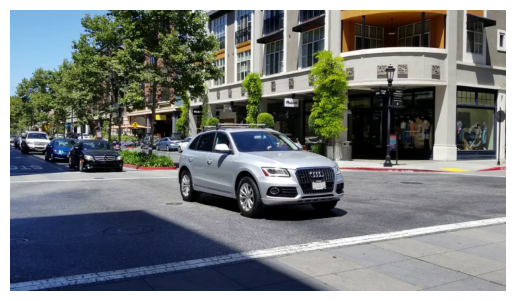

In [5]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils
import importlib
importlib.reload(utils)
# Load the ONNX model

trafficcamnet_prunned_path = "models/trafficcamnet_pruned_onnx_v1.0.4/resnet18_trafficcamnet_pruned.onnx"
dash_path = "models/dashcamnet_pruned_onnx_v1.0.5/resnet18_dashcamnet_pruned.onnx"

sess_options = ort.SessionOptions()

# Enable Graph Optimization (0 = disable, 1 = basic, 2 = extended, 3 = all)
sess_options.graph_optimization_level = ort.GraphOptimizationLevel.ORT_DISABLE_ALL

# Set intra-op thread count (affects parallel execution)
sess_options.intra_op_num_threads = 1

# Set inter-op thread count (affects parallel execution across operators)
sess_options.inter_op_num_threads = 1

# Enable Memory Arena (optimizes memory allocation)
sess_options.enable_cpu_mem_arena = True

# Enable Profiling (useful for debugging and performance analysis)
sess_options.enable_profiling = True

# Load the session with options
session = ort.InferenceSession(dash_path, sess_options)

# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Print output info for debugging
for i, output in enumerate(session.get_outputs()):
    print(f"Output {i}: {output.name}, Shape: {output.shape}")

image_width = 960
image_height = 544


# Prepare input data
# This depends on your model's expected input shape and type
image_path = "images/image2.png"
input_image = utils.image_to_tensor(image_path,width=image_width,height=image_height)
utils.show_image_from_tensor(input_image)
# Run inference
outputs = session.run(output_names, {input_name: input_image})

In [ ]:
import onnxruntime as ort
import numpy as np
from PIL import Image

# Load and preprocess image (resize to 224x224, convert to RGB)
image = Image.open("images/image2.jpg").convert("RGB").resize((224, 224))
# Convert to numpy array, normalize, and add batch dimension
input_data = np.array(image).astype(np.float32) / 255.0  # Normalize to [0,1]
input_data = input_data.transpose(2, 0, 1)  # HWC to CHW format
input_data = np.expand_dims(input_data, axis=0)  # Add batch dimension

# Load ONNX model
model_path = "models/coat_tiny_Opset16.onnx"
session = ort.InferenceSession(model_path)

# Get input and output names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Run inference
results = session.run([output_name], {input_name: input_data})

FileNotFoundError: [Errno 2] No such file or directory: '/home/oscar/cv-model-compression/image/image2.jpg'

Number of clusters: 1
Number of noise points: 510


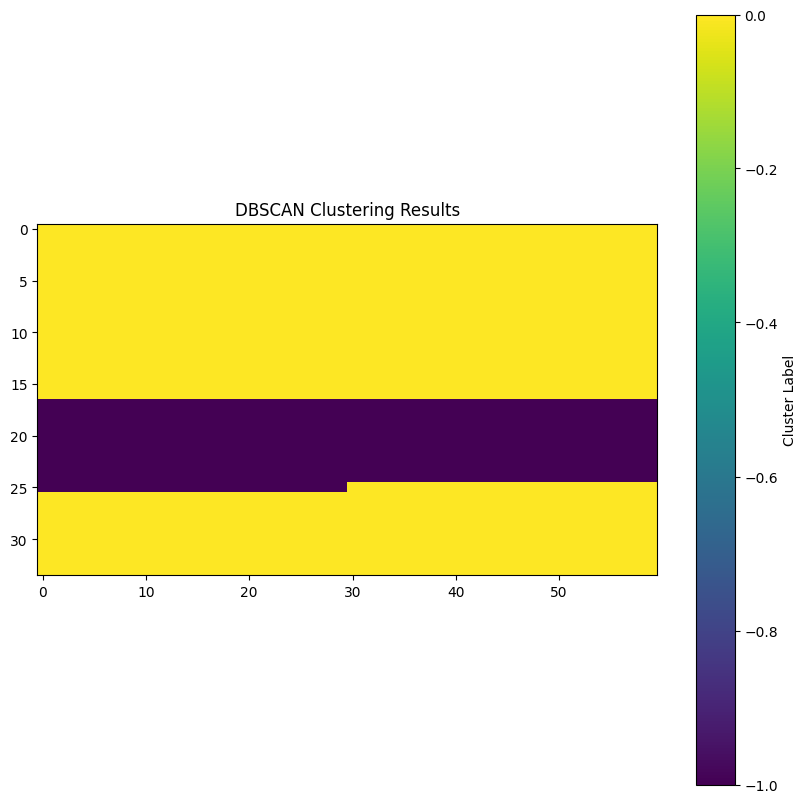

In [2]:
import importlib
importlib.reload(utils)
cov,bbox = outputs[0][0], outputs[1][0]
labels, labels_2d, clustered_data = utils.apply_dbscan_to_vision_output(cov,bbox)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {list(labels).count(-1)}")

# Visualize the clusters
utils.visualize_clusters(labels_2d)

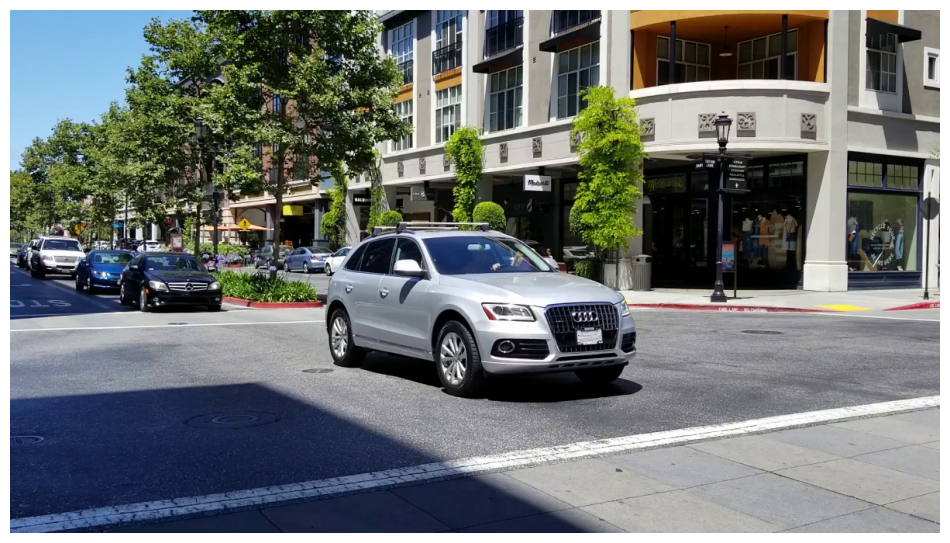

In [3]:
import importlib
importlib.reload(utils)
import cv2

cv2image = cv2.imread(image_path)
detections = utils.process_model_outputs(outputs[0][0], outputs[1][0],input_image.shape[2:],confidence_threshold=0.5)
annotated_image = utils.visualize_detections(cv2image,detections)

In [1]:
import importlib
importlib.reload(utils)
utils.visualize_predictions_grid(image_path,outputs[0][0],confidence_threshold=0.1)

NameError: name 'utils' is not defined